Coefficients: 
 [ 0.03634803  0.32625665  0.04627688  0.76938996  0.98884733 -0.08721263
 -0.16206207]
Variance score: 0.04


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


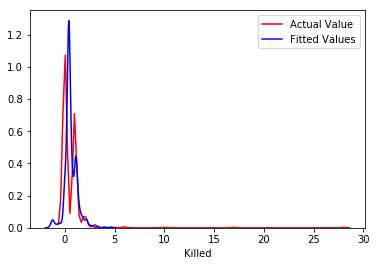

In [3]:
import pandas as pd
import numpy as np
import pprint as pp
from collections import OrderedDict
import requests
import json
import datetime
import spacy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import seaborn as sns

# File to Load (Remember to Change These)
file_to_load = "db/machineLearntCsvData.csv"
schoolData = pd.read_csv(file_to_load, encoding="utf-8-sig")
schoolData.reset_index()
schoolData.fillna(-1)
#schoolData.drop(schoolData.columns[0], axis=1)
schoolData.head()
schoolData = schoolData.drop(schoolData.columns[0], axis=1)
schoolData = schoolData.drop(schoolData.columns[5], axis=1)

schoolData.drop(0, inplace=True)

schoolData.head()
y = schoolData.Killed
X = schoolData.drop('Killed', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=123)
 

# Create linear regression object
regr = linear_model.ElasticNetCV(cv=5, random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

